In [30]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

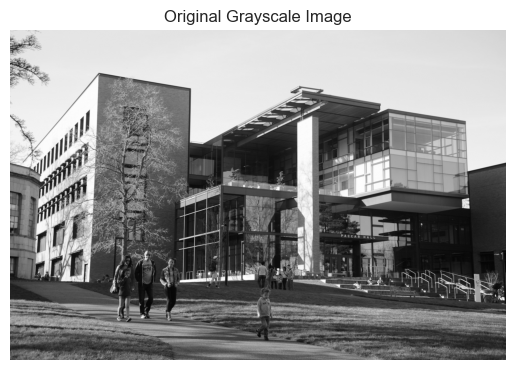

In [31]:
img = cv2.imread('Campus.jpg') # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

#### Analisis Histogram Citra Grayscale Asli

Pada tahap ini, citra berwarna dibaca dan dikonversi menjadi citra grayscale. Konversi ini menyebabkan informasi warna dihilangkan sehingga setiap pixel hanya direpresentasikan oleh satu nilai intensitas dengan rentang 0 hingga 255. Histogram citra grayscale asli menunjukkan distribusi intensitas pixel sebelum dilakukan proses filtering.

Berdasarkan histogram yang dihasilkan, terlihat bahwa distribusi nilai intensitas pixel tersebar pada rentang tertentu dan tidak merata di seluruh skala keabuan. Hal ini menunjukkan bahwa citra memiliki variasi tingkat kecerahan, dengan sebagian area lebih gelap dan sebagian lainnya lebih terang.

Histogram citra asli ini digunakan sebagai acuan awal untuk membandingkan perubahan distribusi intensitas pixel setelah diterapkan berbagai metode filtering pada tahap selanjutnya. Dengan adanya histogram awal ini, efek dari setiap filter terhadap kualitas citra dan penyebaran nilai pixel dapat dianalisis secara lebih jelas.

## Image Filters

Image filters adalah teknik dalam pengolahan citra digital yang melibatkan penggunaan kernel atau matriks kecil untuk memodifikasi nilai piksel dalam citra. Filter ini digunakan untuk berbagai tujuan, seperti mengurangi noise, meningkatkan tepi, atau menerapkan efek artistik. Berikut adalah beberapa jenis filter umum yang sering digunakan dalam pengolahan citra:
1. Smoothing Filters (Low-pass filters)
2. Sharpening Filters (High-pass filters)
3. Edge Detection Filters
4. Embossing Filters
5. Custom Convolution Filters

### Filter Kernel

Filter kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk memodifikasi nilai piksel dalam citra. Kernel ini diterapkan pada setiap piksel citra dengan cara mengalikan nilai piksel tetangga dengan nilai kernel yang sesuai, kemudian menjumlahkan hasilnya untuk mendapatkan nilai baru piksel tersebut. Kernel dapat memiliki berbagai ukuran dan bentuk, tergantung pada efek yang diinginkan.

#### Perbedaan Filter dan Point Operations
| Aspek                  | Filter Kernel                                   | Point Operations                             |
|-----------------------|-------------------------------------------------|----------------------------------------------|
| Definisi              | Menggunakan kernel untuk memodifikasi piksel berdasarkan tetangga | Memanipulasi nilai piksel secara individual tanpa mempertimbangkan tetangga |
| Operasi              | Melibatkan konvolusi dengan kernel             | Melibatkan operasi matematis langsung pada piksel |
| Efek pada Citra      | Mempengaruhi area sekitar piksel				  | Mempengaruhi hanya piksel itu sendiri         |
| Contoh                | Gaussian Blur, Sharpening, Edge Detection | Brightness Adjustment, Contrast Adjustment    |

#### Linear Filters
Linear filters adalah jenis filter yang menggunakan operasi linear pada nilai piksel dan tetangganya. Contoh umum dari linear filters adalah smoothing filters (seperti Gaussian blur) dan sharpening filters. Linear filters mempertahankan hubungan linear antara input dan output, sehingga efeknya dapat diprediksi dan dianalisis dengan mudah.


1. MATRIX PIXEL INPUT (7x7):


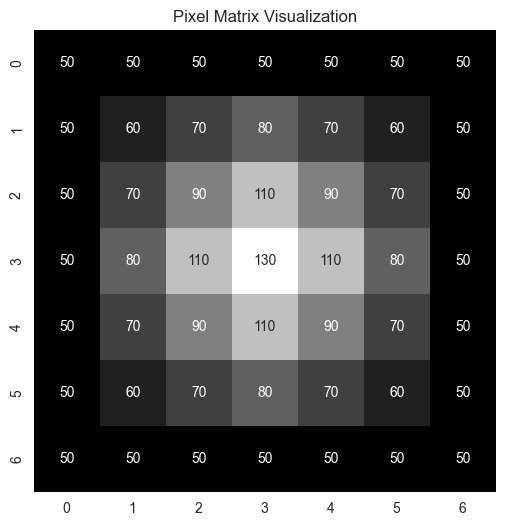

In [32]:
# Matrix pixel input (7x7)
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()

#### Ini bukan analisis histogram citra Melainkan analisis distribusi nilai pixel pada matrix contoh

Pada tahap ini digunakan sebuah matrix pixel berukuran 7×7 sebagai contoh sederhana untuk merepresentasikan nilai intensitas pixel dalam bentuk numerik. Matrix ini berisi nilai intensitas grayscale yang bervariasi, dengan nilai terendah berada di bagian tepi dan nilai tertinggi berada di bagian tengah matrix.

Visualisasi menggunakan heatmap menunjukkan adanya pola gradasi intensitas yang meningkat dari tepi menuju pusat. Hal ini menggambarkan kondisi di mana area tengah memiliki tingkat kecerahan yang lebih tinggi dibandingkan area sekitarnya. Pola seperti ini sering digunakan untuk menjelaskan bagaimana sebuah filter bekerja dengan mempertimbangkan pixel tetangga di sekitar pixel pusat.

Matrix pixel ini berfungsi sebagai ilustrasi awal sebelum diterapkan proses filtering pada citra sebenarnya. Dengan memahami distribusi nilai pixel pada matrix ini, dapat dipahami bahwa proses filtering akan memodifikasi nilai pixel berdasarkan kombinasi atau perhitungan nilai pixel di sekitarnya, sehingga dapat menghasilkan efek perataan atau pengurangan noise pada citra.



2a. AVERAGE/BOX BLUR KERNEL (3x3):


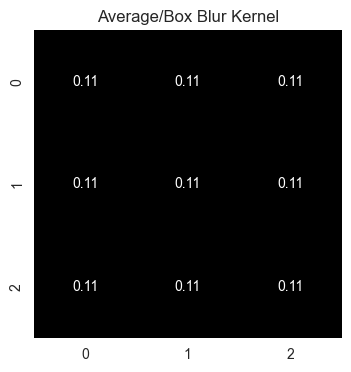

In [33]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()

#### Ini bukan analisis histogram citra Melainkan analisis Average / Box Blur Kernel (3×3)

Kernel Average atau Box Blur berukuran 3×3 ini memiliki nilai bobot yang sama pada setiap elemennya, yaitu sebesar 1/9. Hal ini berarti setiap pixel pada citra hasil akan dihitung sebagai rata-rata dari sembilan pixel, yang terdiri dari satu pixel pusat dan delapan pixel tetangganya.

Visualisasi kernel menunjukkan distribusi bobot yang seragam, sehingga setiap pixel tetangga memberikan kontribusi yang sama terhadap nilai pixel output. Karakteristik ini menyebabkan efek perataan (smoothing) yang cukup kuat, karena perbedaan nilai intensitas antar pixel akan diratakan.

Penggunaan kernel Average ini efektif untuk mengurangi noise pada citra, namun memiliki kelemahan yaitu dapat menghilangkan detail penting dan menyebabkan citra menjadi terlihat lebih blur. Oleh karena itu, kernel ini biasanya digunakan pada tahap awal pemrosesan citra ketika tujuan utama adalah mengurangi gangguan noise tanpa mempertimbangkan ketajaman detail secara tinggi.


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


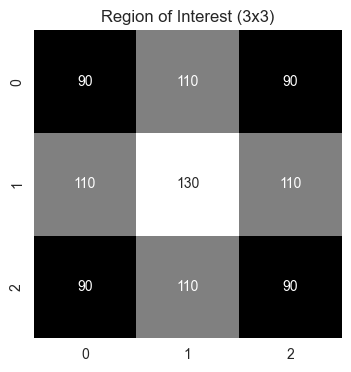

In [34]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()

#### Ini bukan analisis histogram citra Melainkan Analisis Region of Interest (ROI) 3×3

Pada bagian ini ditunjukkan contoh proses konvolusi yang difokuskan pada satu piksel, yaitu piksel tengah pada matrix pixel. Nilai piksel pusat diambil sebagai titik acuan untuk melihat pengaruh piksel-piksel tetangganya dalam proses filtering.

Region of Interest (ROI) berukuran 3×3 diambil dari area sekitar piksel tengah. Visualisasi ROI menunjukkan nilai intensitas dari piksel pusat beserta delapan piksel tetangganya yang akan digunakan dalam perhitungan filter.

Bagian ini bertujuan untuk memberikan pemahaman bahwa nilai piksel hasil filtering tidak hanya dipengaruhi oleh piksel itu sendiri, tetapi juga oleh nilai piksel di sekitarnya sesuai dengan kernel yang digunakan.


Konvolusi dengan Average Kernel:
ROI × Kernel:


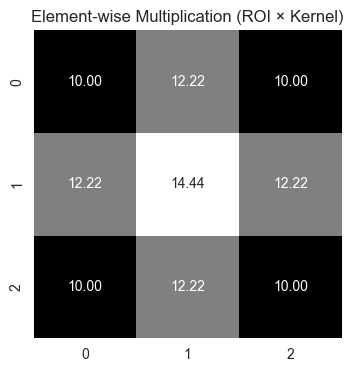

Sum (Hasil Konvolusi): 103.33


In [35]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")

#### Ini bukan analisis histogram citra Melainkan Analisis Konvolusi Menggunakan Average Kernel

Pada tahap ini dilakukan proses konvolusi antara Region of Interest (ROI) berukuran 3×3 dengan kernel Average. Setiap nilai pixel pada ROI dikalikan dengan bobot kernel yang bersesuaian secara element-wise.

Visualisasi hasil perkalian elemen menunjukkan kontribusi masing-masing pixel tetangga terhadap nilai akhir. Karena kernel Average memiliki bobot yang sama, setiap pixel memberikan pengaruh yang seimbang dalam proses perhitungan.

Nilai hasil konvolusi diperoleh dengan menjumlahkan seluruh hasil perkalian tersebut. Nilai ini merepresentasikan nilai pixel baru pada citra hasil setelah diterapkan filter Average, yang pada umumnya menghasilkan efek perataan intensitas pixel.



Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


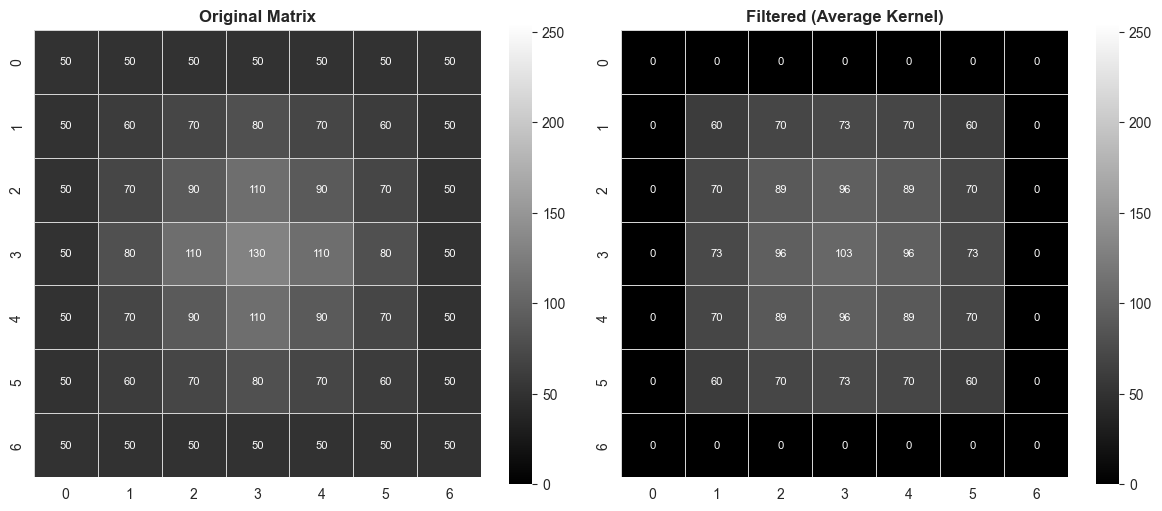

In [36]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### Ini bukan analisis histogram citra Melainkan Analisis Penerapan Average Filter pada Matrix Pixel

Pada bagian ini dilakukan penerapan filter Average secara manual ke seluruh matrix pixel menggunakan proses konvolusi. Konvolusi dilakukan dengan menggeser kernel Average 3×3 ke setiap posisi pixel dan menghitung nilai pixel baru berdasarkan rata-rata nilai pixel di sekitarnya.

Proses padding digunakan agar kernel dapat diterapkan pada area yang memiliki tetangga lengkap, sehingga ukuran matrix output tetap sama dengan matrix input. Nilai pixel pada matrix output diperoleh dari hasil penjumlahan perkalian antara Region of Interest (ROI) dan kernel Average.

Hasil visualisasi menunjukkan bahwa nilai intensitas pada matrix hasil menjadi lebih halus dibandingkan matrix asli. Perubahan nilai yang ekstrem berkurang, menandakan bahwa filter Average berhasil melakukan perataan (smoothing), namun juga menyebabkan penurunan ketajaman detail pada beberapa area.


In [37]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Latihan

Buat matrix piksel 10x10 dengan nilai random antara 0-255, kemudian terapkan filter dengan matrix berikut ini:

```
Filter Kernel:
┌─                 ─┐
| 0.075 0.125 0.075 |
| 0.125 0.200 0.125 |
| 0.075 0.125 0.075 |
└─                 ─┘
```
Visualisasikan matrix original, matrix filter, dan matrix hasil filter menggunakan heatmap dari seaborn.

In [38]:
# Tulis kode di sini


#### Contoh Kernel Umum
| Nama Kernel       | Ukuran | Deskripsi                                      | Contoh Kernel                      |
|-------------------|--------|------------------------------------------------|-----------------------------------|
| Gaussian Blur    | 3x3    | Mengurangi noise dengan efek blur               | `[[1, 2, 1], [2, 4, 2], [1, 2,1]] / 16` |
| Average/Box Blur | 3x3    | Menghaluskan citra dengan rata-rata piksel tetangga | `[[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9` |
| Sharpening       | 3x3    | Meningkatkan tepi dan detail citra               | `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]` |
| Edge Detection   | 3x3    | Mendeteksi tepi dalam citra                     | `[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]` |
| Embossing        | 3x3    | Memberikan efek timbul pada citra                  | `[[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]` |
| Custom Kernel    | NxN    | Kernel yang dapat disesuaikan untuk efek khusus         | Variabel sesuai kebutuhan         |

**Visualisasi Kernel:**

```
Gaussian Blur:          Average/Box Blur:       Sharpening: 
┌─              ─┐        ┌─             ─┐         ┌─           ─┐
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
│ 2/16 4/16 2/16 │÷16     │ 1/9  1/9  1/9 │÷9       │ -1   5  -1  │
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
└─              ─┘        └─             ─┘         └─           ─┘
Edge Detection:         Embossing:
┌─           ─┐       ┌─            ─┐
│ -1  -1  -1  │       │  -2  -1   0  │
│ -1   8  -1  │       │  -1   1   1  │
│ -1  -1  -1  │       │   0   1   2  │
└─           ─┘       └─            ─┘
```

### 1. Smoothing Filters (Low-pass filters)
**Konsep:**
Smoothing filters digunakan untuk mengurangi noise dan detail halus dalam citra. Filter ini bekerja dengan menggantikan nilai piksel dengan rata-rata atau median dari piksel tetangganya, sehingga menghasilkan efek blur yang menghaluskan citra.

**Implementasi:**
```python
# Menggunakan Gaussian Blur sebagai contoh smoothing filter
blurred = cv2.GaussianBlur(img, (3, 3), 0)
show_image(blurred, "Gaussian Blurred Image")
```

**`GaussianBlur()`**
Fungsi ini menerapkan Gaussian Blur pada citra. Parameter pertama adalah citra input, parameter kedua adalah ukuran kernel (harus ganjil), dan parameter ketiga adalah standar deviasi Gaussian.

Parameter:
- `img`: Citra input yang akan di-blur.
- `(3, 3)`: Ukuran kernel Gaussian (3x3).
- `0`: Standar deviasi Gaussian. Jika 0, maka dihitung berdasarkan ukuran kernel.

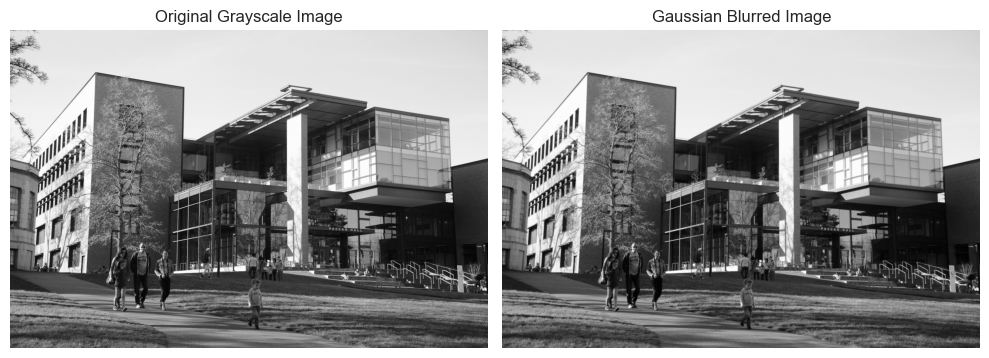

In [39]:
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Histogram Penerapan Gaussian Filter pada Citra Grayscale

Pada tahap ini, filter Gaussian berukuran 3×3 diterapkan pada citra grayscale asli. Filter Gaussian bekerja dengan memberikan bobot yang lebih besar pada piksel pusat dan bobot yang lebih kecil pada piksel di sekitarnya, sehingga menghasilkan efek perataan yang lebih halus dibandingkan filter Average.

Perbandingan antara citra asli dan citra hasil Gaussian Blur menunjukkan bahwa noise pada citra berkurang dan transisi intensitas antar piksel menjadi lebih halus. Meskipun terjadi efek blur, struktur utama citra masih dapat dipertahankan dengan baik.

Hasil citra ini selanjutnya digunakan untuk menganalisis perubahan distribusi intensitas pixel melalui histogram, sehingga dapat diketahui pengaruh Gaussian filter terhadap penyebaran nilai pixel pada citra.

### 2. Sharpening Filters (High-pass filters)
**Konsep:**
Sharpening filters digunakan untuk meningkatkan tepi dan detail dalam citra. Filter ini bekerja dengan menonjolkan perbedaan antara piksel pusat dan tetangganya, sehingga membuat tepi lebih jelas.

**Implementasi:**
```python
# Menggunakan kernel sharpening sebagai contoh
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)
```

**`filter2D()`**
Fungsi ini menerapkan filter konvolusi pada citra menggunakan kernel yang ditentukan. Parameter pertama adalah citra input, parameter kedua adalah kedalaman output (-1 berarti sama dengan input), dan parameter ketiga adalah kernel filter.

Parameter:
- `img`: Citra input yang akan di-sharpen.
- `-1`: Kedalaman output (sama dengan input).
- `kernel`: Kernel sharpening yang digunakan untuk filter.

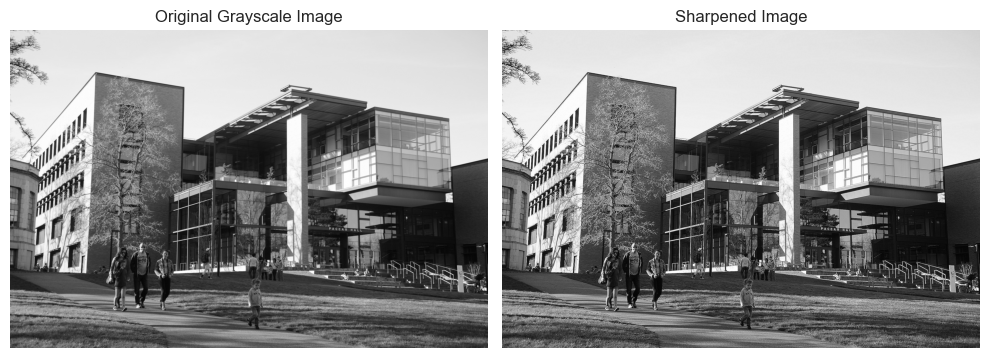

In [40]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(sharpened_image, cmap='gray')
axes[1].set_title("Sharpened Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Histogram Penerapan Sharpening Filter pada Citra Grayscale

Pada tahap ini diterapkan filter penajaman (sharpening) pada citra grayscale menggunakan kernel 3×3. Kernel ini dirancang untuk menonjolkan perbedaan nilai intensitas antar piksel, terutama pada area tepi (edge) citra.

Perbandingan citra asli dan citra hasil sharpening menunjukkan bahwa detail dan tepi objek terlihat lebih tegas. Nilai intensitas pada area yang memiliki perubahan kontras tinggi menjadi lebih menonjol, sehingga citra tampak lebih tajam.

Hasil dari proses sharpening ini nantinya akan memengaruhi bentuk histogram, di mana variasi nilai intensitas cenderung meningkat akibat penekanan perbedaan antar piksel.

### 3. Edge Detection Filters
**Konsep:**
Edge detection filters digunakan untuk mendeteksi tepi dalam citra dengan menyoroti perubahan tajam dalam intensitas piksel. Filter ini sering digunakan dalam analisis citra untuk mengenali objek.

**Implementasi:**
```python
# Menggunakan kernel edge detection sebagai contoh
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edges = cv2.filter2D(img, -1, kernel)
```	

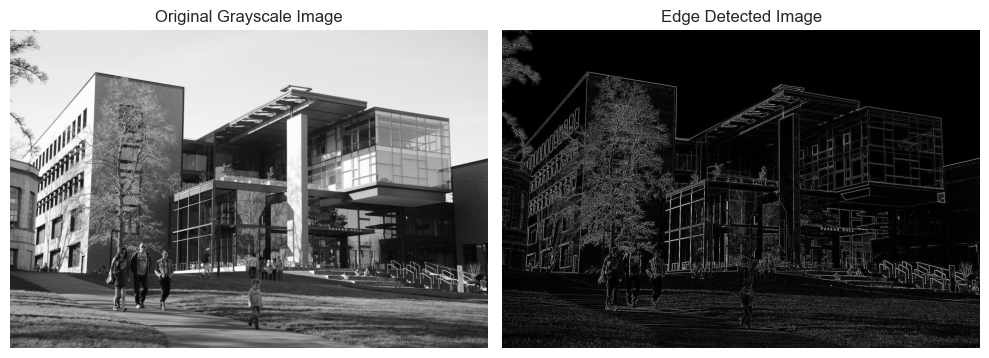

In [41]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Histogram Penerapan Edge Detection Filter pada Citra Grayscale

Pada tahap ini digunakan kernel edge detection berukuran 3×3 untuk mendeteksi tepi pada citra grayscale. Kernel ini bekerja dengan menonjolkan perbedaan intensitas yang signifikan antar piksel di sekitarnya, sehingga area dengan perubahan intensitas tajam dapat terlihat lebih jelas.

Perbandingan antara citra asli dan citra hasil menunjukkan bahwa bagian tepi objek menjadi lebih dominan, sementara area dengan intensitas yang relatif homogen menjadi lebih gelap atau tidak menonjol. Hal ini menandakan bahwa filter edge detection efektif dalam mengekstraksi informasi batas atau kontur objek.

Proses ini umumnya digunakan sebagai tahap awal dalam analisis citra, seperti segmentasi atau pengenalan pola, karena mampu menekankan struktur penting pada citra.

### 4. Embossing Filters
**Konsep:**
Embossing filters memberikan efek timbul pada citra dengan menyoroti tepi dan memberikan bayangan. Filter ini menciptakan ilusi kedalaman dengan mengubah intensitas piksel berdasarkan tetangganya.

**Implementasi:**
```python
# Menggunakan kernel embossing sebagai contoh
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
embossed = cv2.filter2D(img, -1, kernel)
```

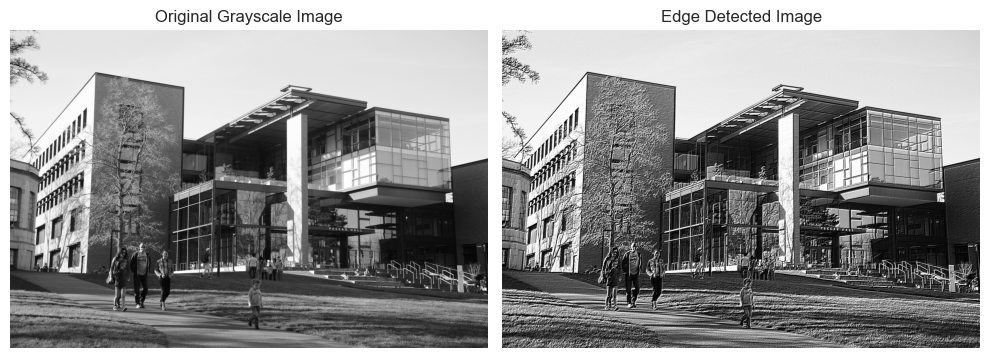

In [42]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Histogram Penerapan Edge Detection dengan Kernel Arah Tertentu pada Citra Grayscale

Pada tahap ini digunakan kernel edge detection dengan pola bobot yang tidak simetris. Kernel ini dirancang untuk menonjolkan perubahan intensitas pixel pada arah tertentu, sehingga tepi objek dengan orientasi tertentu akan terlihat lebih jelas dibandingkan arah lainnya.

Hasil citra menunjukkan bahwa garis atau tepi dengan arah tertentu menjadi lebih dominan, sementara tepi dengan arah yang berbeda kurang terlihat. Hal ini menandakan bahwa kernel memiliki sensitivitas arah, berbeda dengan kernel edge detection sebelumnya yang bersifat lebih umum.

Pendekatan ini berguna untuk analisis struktur citra berdasarkan arah tepi, misalnya untuk mendeteksi kontur atau pola tertentu yang memiliki orientasi dominan.

### 5. Custom Convolution Filters
**Konsep:**
Custom convolution filters memungkinkan pengguna untuk membuat kernel mereka sendiri sesuai dengan kebutuhan spesifik. Ini memberikan fleksibilitas dalam menerapkan berbagai efek pada citra.
**Implementasi:**
```python
# Membuat kernel custom sebagai contoh
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img, -1, custom_kernel)
```

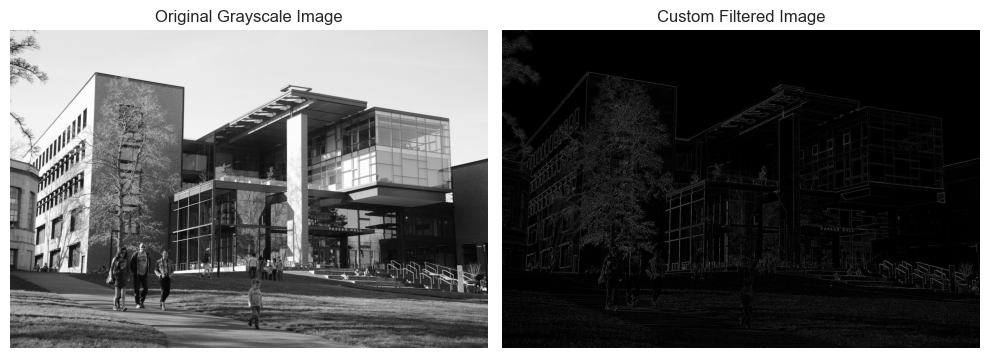

In [43]:
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(custom_filtered, cmap='gray')
axes[1].set_title("Custom Filtered Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Analisis Histogram Penerapan Custom Filter pada Citra Grayscale

Pada tahap ini diterapkan filter kustom menggunakan kernel 3×3 yang dirancang untuk menonjolkan perbedaan intensitas antar piksel. Kernel ini menekankan piksel pusat dan mengurangi kontribusi piksel di sekitarnya, sehingga mampu memperjelas struktur dan detail pada citra.

Perbandingan antara citra asli dan citra hasil menunjukkan bahwa garis dan batas objek menjadi lebih terlihat, sementara area yang relatif homogen tidak mengalami perubahan signifikan. Efek yang dihasilkan berada di antara proses penajaman dan deteksi tepi.

Penggunaan filter kustom ini menunjukkan bahwa karakteristik hasil filtering sangat bergantung pada nilai dan pola kernel yang digunakan.

#### Kesimpulan

Berdasarkan hasil percobaan dan analisis yang telah dilakukan pada notebook ini, dapat disimpulkan bahwa proses filtering pada citra digital bekerja dengan memanfaatkan nilai piksel tetangga melalui operasi konvolusi. Penggunaan berbagai jenis kernel menghasilkan efek yang berbeda terhadap kualitas dan karakteristik citra.

Filter smoothing seperti Average dan Gaussian filter mampu mengurangi noise dan meratakan nilai intensitas piksel, namun dapat menyebabkan penurunan ketajaman detail citra. Gaussian filter memberikan hasil perataan yang lebih halus dibandingkan Average filter karena penggunaan bobot yang terdistribusi secara normal. Sebaliknya, filter penajaman dan edge detection bertujuan untuk menonjolkan detail dan tepi objek dengan meningkatkan perbedaan intensitas antar piksel.

Selain itu, penggunaan kernel kustom menunjukkan bahwa hasil filtering sangat bergantung pada desain dan nilai kernel. Dengan memahami pengaruh setiap filter terhadap citra dan distribusi intensitas piksel, proses filtering dapat disesuaikan dengan kebutuhan aplikasi, baik untuk pengurangan noise, peningkatan ketajaman, maupun ekstraksi informasi tepi pada citra digital.